In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 

from snewpy.neutrino import Flavor, MassHierarchy
from snewpy.models.ccsn import Sukhbold_2015, Tamborra_2014
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, ThreeFlavorDecoherence, CompleteExchange

mpl.rc('font', size=16)
%matplotlib inline

In [94]:
sukh_220 = Sukhbold_2015(progenitor_mass=27*u.solMass, eos='LS220')
sukh_sfho = Sukhbold_2015(progenitor_mass=27*u.solMass, eos='SFHo')

tamb_11 = Tamborra_2014(progenitor_mass=11.2*u.solMass, direction=1)
tamb_20 = Tamborra_2014(progenitor_mass=20*u.solMass, direction=1)
tamb_27 = Tamborra_2014(progenitor_mass=27*u.solMass, direction=1)

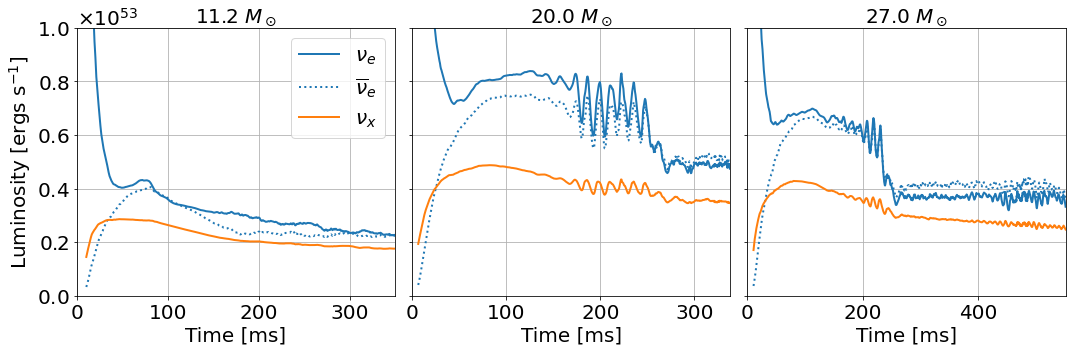

In [106]:
flavs = [Flavor.NU_E, Flavor.NU_E_BAR, Flavor.NU_X]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, tight_layout=True)

for i, model in enumerate([tamb_11, tamb_20, tamb_27]):
    ax = axes[i]
    for flavor in flavs:
        ax.plot(model.time*1000, model.luminosity[flavor],  # Report luminosity in units foe/s
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':',
                lw=2)
    ax.set_xlim(0, model.time[-1].value*1000)
    ax.set_ylim(0, 1E53)
    ax.set_xlabel(r'Time [ms]', fontsize=20)
    ax.set_title(r'{} $M_\odot$'.format(model.metadata['Progenitor mass'].value), fontsize=20)
    
    # change y ticks to show a x 10^b
    ax.ticklabel_format(axis='y', style='sci', scilimits=(53, 53), useOffset=False, useMathText=True)
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.tick_params(labelsize=20)
    
    ax.grid()

axes[0].legend(loc='upper right', ncol=1, fontsize=20)
axes[0].set_ylabel(r'Luminosity [ergs s$^{-1}$]', fontsize=20)
plt.tight_layout()
plt.savefig('./plots/ftf_models_11-27.pdf', dpi = 200)

In [107]:
tamb_27_1 = Tamborra_2014(progenitor_mass=27*u.solMass, direction=1)
tamb_27_2 = Tamborra_2014(progenitor_mass=27*u.solMass, direction=2)
tamb_27_3 = Tamborra_2014(progenitor_mass=27*u.solMass, direction=3)

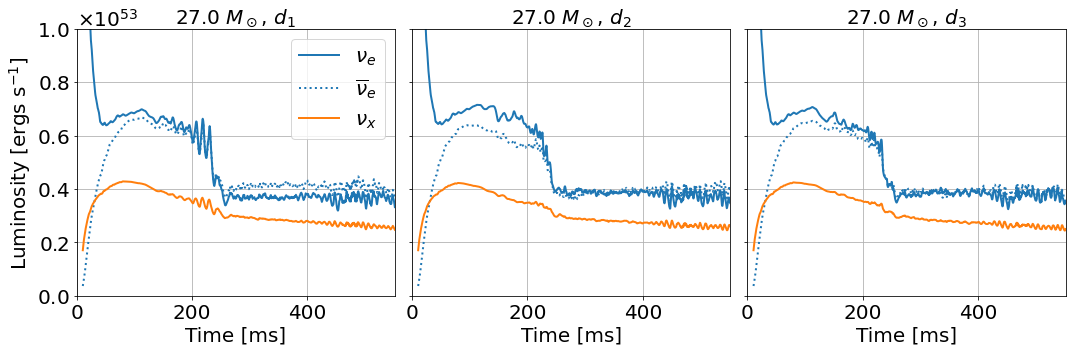

In [108]:
flavs = [Flavor.NU_E, Flavor.NU_E_BAR, Flavor.NU_X]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, tight_layout=True)

for i, model in enumerate([tamb_27_1, tamb_27_2, tamb_27_3]):
    ax = axes[i]
    for flavor in flavs:
        ax.plot(model.time*1000, model.luminosity[flavor],  # Report luminosity in units foe/s
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':',
                lw=2)
    ax.set_xlim(0, model.time[-1].value*1000)
    ax.set_ylim(0, 1E53)
    ax.set_xlabel(r'Time [ms]', fontsize=20)
    ax.set_title(r'{} $M_\odot$, $d_{}$'.format(model.metadata['Progenitor mass'].value, i+1), fontsize=20)
    
    # change y ticks to show a x 10^b
    ax.ticklabel_format(axis='y', style='sci', scilimits=(53, 53), useOffset=False, useMathText=True)
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.tick_params(labelsize=20)
    ax.grid()

axes[0].legend(loc='upper right', ncol=1, fontsize=20)
axes[0].set_ylabel(r'Luminosity [ergs s$^{-1}$]', fontsize=20)
plt.tight_layout()
plt.savefig('./plots/ftf_models_27_alldirs.pdf', dpi = 200)

In [109]:
model = Tamborra_2014(progenitor_mass=20*u.solMass, direction=1)

# Adiabatic MSW effect
xform_nmo = AdiabaticMSW(mh=MassHierarchy.NORMAL)
xform_imo = AdiabaticMSW(mh=MassHierarchy.INVERTED)

# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,100,201) * u.MeV
t = 200*u.ms

ispec = model.get_initial_spectra(t, E)
ospec_nmo = model.get_transformed_spectra(t, E, xform_nmo)
ospec_imo = model.get_transformed_spectra(t, E, xform_imo)

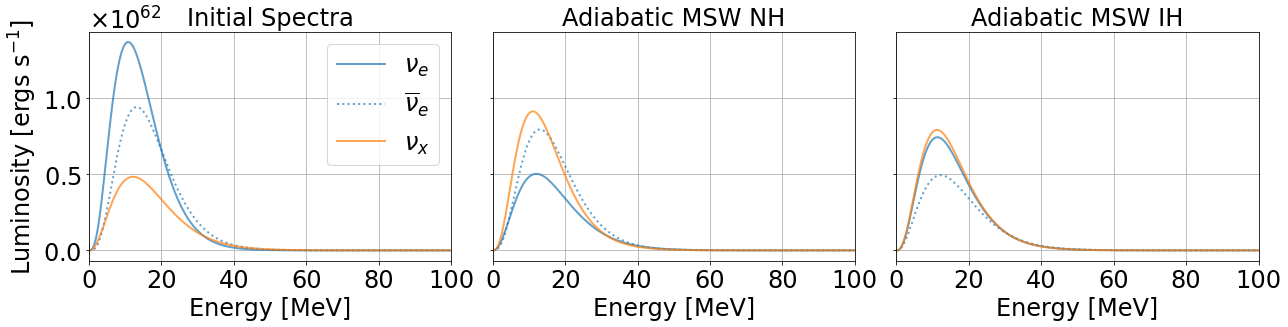

In [153]:
flavs = [Flavor.NU_E, Flavor.NU_E_BAR, Flavor.NU_X]

fig, axes = plt.subplots(1,3, figsize=(18,5), sharex=True, sharey=True, tight_layout=True)

for i, spec in enumerate([ispec, ospec_nmo, ospec_imo]):
    ax = axes[i]
    for flavor in flavs:
        ax.plot(E, spec[flavor],
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2,
                alpha=0.7)
    
    if i == 1:
        shier = 'NH'
    elif i == 2:
        shier = 'IH'
        
    ax.set_xlim(0, E[-1].value)
    #ax.set_ylim(0, 1E53)
    ax.set_xlabel(r'Energy [{}]'.format(E.unit), fontsize=24)
    ax.set_title('Initial Spectra' if i==0 else 'Adiabatic MSW ' + shier, fontsize=24)
    
    # change y ticks to show a x 10^b
    ax.ticklabel_format(axis='y', style='sci', scilimits=(62, 62), useOffset=False, useMathText=True)
    ax.yaxis.get_offset_text().set_fontsize(24)
    ax.tick_params(labelsize=24)
    ax.grid()
    
ax = axes[0]
ax.set(ylabel=r'flux [erg$^{-1}$ s$^{-1}$]')

axes[0].legend(loc='upper right', ncol=1, fontsize=24)
axes[0].set_ylabel(r'Luminosity [ergs s$^{-1}$]', fontsize=24)
plt.tight_layout()
plt.savefig('./plots/ftf_flavortrans_msw.pdf', dpi = 200)

In [148]:
model = Tamborra_2014(progenitor_mass=20*u.solMass, direction=1)

# Three Flavour Decoherence effect.
xform_nt = NoTransformation()
xform_ce = CompleteExchange()

# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,100,201) * u.MeV
t = 200*u.ms

ispec = model.get_initial_spectra(t, E)
ospec_nt = model.get_transformed_spectra(t, E, xform_nt)
ospec_ce = model.get_transformed_spectra(t, E, xform_ce)

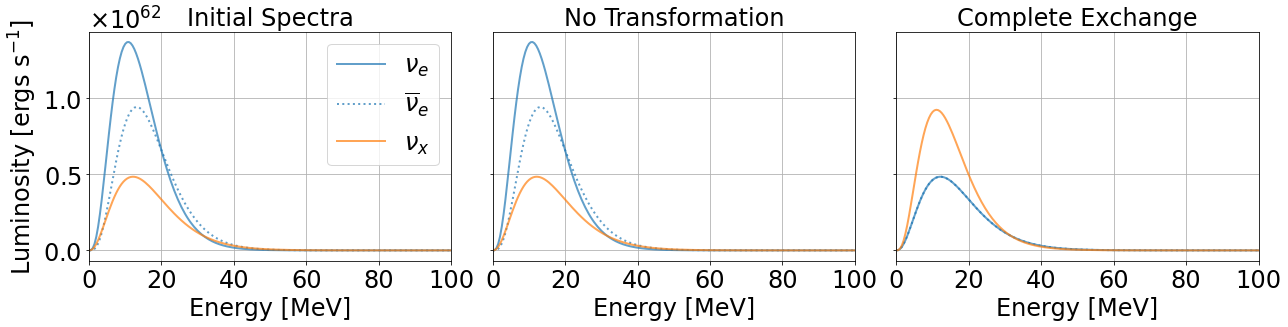

In [154]:
flavs = [Flavor.NU_E, Flavor.NU_E_BAR, Flavor.NU_X]

fig, axes = plt.subplots(1,3, figsize=(18,5), sharex=True, sharey=True, tight_layout=True)

for i, spec in enumerate([ispec, ospec_nt, ospec_ce]):
    ax = axes[i]
    for flavor in flavs:
        ax.plot(E, spec[flavor],
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2,
                alpha=0.7)
    ax.set_xlim(0, E[-1].value)
    ax.set_xlabel(r'Energy [{}]'.format(E.unit), fontsize=24)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(62, 62), 
                        useOffset=False, useMathText=True)

    if i == 0:
        stitle = 'Initial Spectra'
    elif i == 1:
        stitle = 'No Transformation'    
    elif i == 2:
        stitle = 'Complete Exchange'

    ax.set_title(stitle, fontsize=24)  
 
    ax.yaxis.get_offset_text().set_fontsize(24)
    ax.tick_params(labelsize=24)
    ax.grid()

axes[0].legend(loc='upper right', ncol=1, fontsize=24)
axes[0].set_ylabel(r'Luminosity [ergs s$^{-1}$]', fontsize=24)
plt.tight_layout()
plt.savefig('./plots/ftf_flavortrans_ntec.pdf', dpi = 200)